In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests

In [2]:
headers = {
    'Referer': 'http://music.163.com',
    'Host': 'music.163.com',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'User-Agent': 'Chrome/10'
}

In [3]:
def getsong(headers):
    url = 'http://music.163.com/api/playlist/detail?id=4963363043'
    res = requests.request('GET', url, headers=headers)
    page = res.json()
    tracks=page['result']['tracks']
    list = []
    for i in range(len(tracks)):
        Name = tracks[i]["name"]
        list.append(Name)
    return list

In [4]:
def create_WordCloud(list):
    print("根源词频计算词云")
    wc = WordCloud(
        font_path="./wc.ttf",
        max_words=100, # 设置最大字数
        width=2000, # 设置画布宽度
        height=1200, # 设置画布高度
        random_state=100
    )
    wordcloud=wc.generate(list)
    # 写词云图片
    wordcloud.to_file("歌单词云.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    # 不需要显示X/Y轴，用off将坐标轴关闭
    plt.axis("off")
    plt.show()

In [5]:
# 去掉停用词以及中英文混合的词
def remove_stop_words(f):
    stop_words = ['(伴奏)', '(Demo版)', '(必胜客新春版)']
    mixed_words = ['Bonus Track：一荤一素', 'Bonus Track：给你给我']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    for mixed_word in mixed_words:
        f = f.replace(mixed_word, mixed_word[12:])
    return f

In [6]:
gerlists = getsong(headers)
# 获取歌单是list类型直接转化为转换为str
lists_str = " ".join(gerlists)

根源词频计算词云


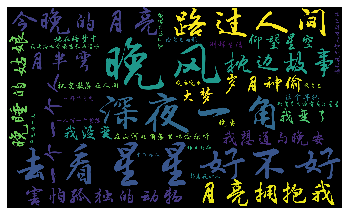

In [7]:
lists = remove_stop_words(lists_str)
create_WordCloud(lists)